### Importing the libraries

In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
path = "E:\\Kartikeya\Python Learning\\1. Tree Based Decision Classifier\\Data"

In [3]:
os.chdir(path)

### Data Exploration and Manipulation

In [4]:
data = pd.read_csv("credit_history.csv")

In [5]:
data.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [6]:
data.isnull().sum()

default        0
amount         0
grade          0
years        279
ownership      0
income         0
age            0
dtype: int64

In [7]:
data.years.describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [8]:
data['years'].describe()

count    7448.000000
mean        6.086332
std         6.700758
min         0.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        62.000000
Name: years, dtype: float64

In [9]:
data.fillna(value=4,inplace=True)

In [10]:
data.isna().sum()

default      0
amount       0
grade        0
years        0
ownership    0
income       0
age          0
dtype: int64

### Splitting the Data into Predictors and Target Variable - We shall also use get_dummies in this step

In [11]:
x = data.drop("default",axis=1)

In [12]:
x.head()

,amount,grade,years,ownership,income,age
0,1000,B,2.0,RENT,19200.0,24
1,6500,A,2.0,MORTGAGE,66000.0,28
2,2400,A,2.0,RENT,60000.0,36
3,10000,C,3.0,RENT,62000.0,24
4,4000,C,2.0,RENT,20000.0,28


In [13]:
y = data.default

In [14]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: default, dtype: int64

In [15]:
x=pd.get_dummies(x)

In [16]:
x.head()

,amount,years,income,age,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,1000,2.0,19200.0,24,0,1,0,0,0,0,0,0,0,0,1
1,6500,2.0,66000.0,28,1,0,0,0,0,0,0,1,0,0,0
2,2400,2.0,60000.0,36,1,0,0,0,0,0,0,0,0,0,1
3,10000,3.0,62000.0,24,0,0,1,0,0,0,0,0,0,0,1
4,4000,2.0,20000.0,28,0,0,1,0,0,0,0,0,0,0,1


### Importing Scikit Learn and Splitting the Data into Training and Testing

In [17]:
import sklearn.model_selection as model_selection

In [18]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.2, random_state=200)

In [19]:
x_train.shape

(6181, 15)

In [20]:
x_test.shape

(1546, 15)

In [21]:
y_train.shape

(6181,)

In [22]:
y_test.shape

(1546,)

In [23]:
x_train.size

92715

In [24]:
x_test.size

23190

In [25]:
6181*15

92715

In [26]:
1546*15

23190

### Scikit Learn Decision Trees

In [27]:
import sklearn.tree as tree
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state = 200)
clf.fit(x_train,y_train)


DecisionTreeClassifier(max_depth=3, random_state=200)

In [28]:
clf.score(x_test,y_test)

0.6274256144890039

In [29]:
clf.score(x_train,y_train)

0.6324219381977026

In [30]:
clf.predict_proba(x_train)

array([[0.49720149, 0.50279851],
       [0.62803532, 0.37196468],
       [0.33271144, 0.66728856],
       ...,
       [0.49720149, 0.50279851],
       [0.49720149, 0.50279851],
       [0.43351351, 0.56648649]])

In [31]:
from sklearn.metrics import roc_auc_score

In [32]:
roc_auc_score(y_test, clf.predict_proba(x_test)[:,1])

0.6721250820352787

### Importing Matplotlib 

In [33]:
import matplotlib
from matplotlib import pyplot as plt
from graphviz import Source

In [34]:
from sklearn import tree

[Text(167.4, 190.26, 'X[4] <= 0.5\ngini = 0.499\nsamples = 6181\nvalue = [3242, 2939]'),
 Text(83.7, 135.9, 'X[5] <= 0.5\ngini = 0.495\nsamples = 4511\nvalue = [2038, 2473]'),
 Text(41.85, 81.53999999999999, 'X[2] <= 64996.0\ngini = 0.466\nsamples = 2533\nvalue = [936, 1597]'),
 Text(20.925, 27.180000000000007, 'gini = 0.444\nsamples = 1608\nvalue = [535, 1073]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.491\nsamples = 925\nvalue = [401, 524]'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 55981.5\ngini = 0.493\nsamples = 1978\nvalue = [1102, 876]'),
 Text(104.625, 27.180000000000007, 'gini = 0.5\nsamples = 1072\nvalue = [533, 539]'),
 Text(146.475, 27.180000000000007, 'gini = 0.467\nsamples = 906\nvalue = [569, 337]'),
 Text(251.10000000000002, 135.9, 'X[2] <= 54498.0\ngini = 0.402\nsamples = 1670\nvalue = [1204, 466]'),
 Text(209.25, 81.53999999999999, 'X[2] <= 27108.0\ngini = 0.467\nsamples = 818\nvalue = [514, 304]'),
 Text(188.32500000000002, 27.18000000000

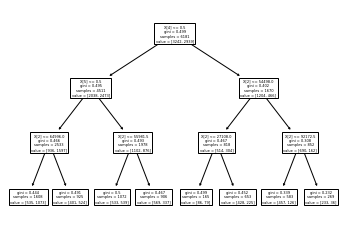

In [35]:
tree.plot_tree(clf)

In [36]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_4 <= 0.50
|   |--- feature_5 <= 0.50
|   |   |--- feature_2 <= 64996.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  64996.00
|   |   |   |--- class: 1
|   |--- feature_5 >  0.50
|   |   |--- feature_2 <= 55981.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  55981.50
|   |   |   |--- class: 0
|--- feature_4 >  0.50
|   |--- feature_2 <= 54498.00
|   |   |--- feature_2 <= 27108.00
|   |   |   |--- class: 0
|   |   |--- feature_2 >  27108.00
|   |   |   |--- class: 0
|   |--- feature_2 >  54498.00
|   |   |--- feature_2 <= 92172.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  92172.50
|   |   |   |--- class: 0



In [37]:
x.columns

Index(['amount', 'years', 'income', 'age', 'grade_A', 'grade_B', 'grade_C',
       'grade_D', 'grade_E', 'grade_F', 'grade_G', 'ownership_MORTGAGE',
       'ownership_OTHER', 'ownership_OWN', 'ownership_RENT'],
      dtype='object')

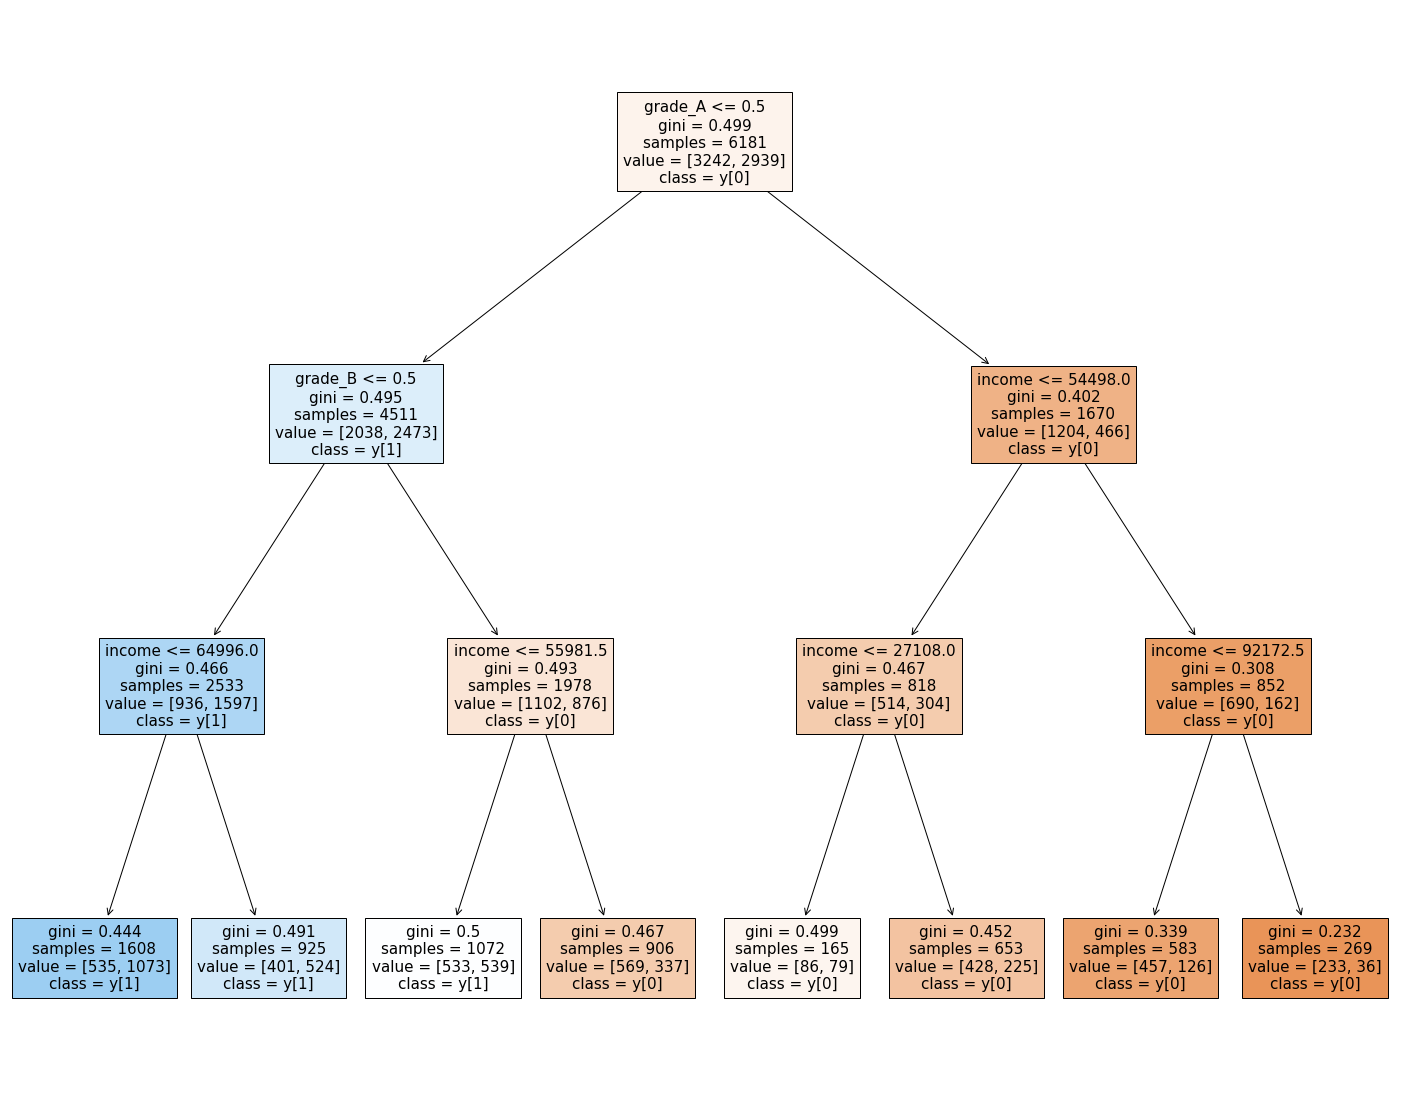

In [38]:
fig = plt.figure(figsize=(25,20))
fn = 'amount', 'years', 'income', 'age', 'grade_A', 'grade_B', 'grade_C','grade_D', 'grade_E', 'grade_F', 'grade_G', 'ownership_MORTGAGE','ownership_OTHER', 'ownership_OWN', 'ownership_RENT'
my_tree = tree.plot_tree(clf,
                   feature_names=fn,class_names=True,filled=True)

In [45]:
fig.savefig("my_tree_2.png")